# Dataset
## Comments with multiple characteristics


In this notebook we will check comments having multiple characteristics

In [32]:
%load_ext autoreload
%autoreload 2
import json

with open("../../output/dataset.json") as f:
    articles = json.load(f)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

characteristics = [
    'WOMEN',
    'LGBTI',
    'RACISM',
    'CLASS',
    'POLITICS',
    'DISABLED',
    'APPEARANCE',
    'CRIMINAL'
]

df = pd.DataFrame([
    {   
        **{"context": art["tweet_text"], "article_id": art["tweet_id"]},
        **comm,
    }
    for art in articles
    for comm in art["comments"]
]).set_index("id")

df["num_chars"] = df[characteristics].sum(axis=1)


df.loc[(df["num_chars"] > 0), "num_chars"].value_counts()
#plt.semilogy()

1    6777
2    1718
3     199
4      20
5       1
Name: num_chars, dtype: int64

In [34]:
df.loc[(df["num_chars"] > 0), "num_chars"].value_counts(normalize=True)

1    0.777625
2    0.197131
3    0.022834
4    0.002295
5    0.000115
Name: num_chars, dtype: float64

In [35]:
pd.options.display.max_colwidth = 320

df[df["num_chars"] >= 3][["context", "text"] + characteristics].sample(10, random_state=11).reset_index()[["context", "text"] + characteristics]

,context,text,WOMEN,LGBTI,RACISM,CLASS,POLITICS,DISABLED,APPEARANCE,CRIMINAL
0,"Ofelia Fernández apoyó al Gobierno en la polémica por los presos y apuntó a la Justicia que ""odia a las mujeres"" https://t.co/BD3jgGCOWI","@usuario Hijadept,, ojala pronto recibas la visita de alguno de esos gusanos. Te van a quedar. Ganas de apoyar al. Gobierno? Larva rastrera gorda. Decerebrada",1,0,0,0,1,1,1,0
1,[OPINIÓN] Es hora de ponerle límites al odio | Por Victoria Donda https://t.co/AZZHGA1gL4,"@usuario Justo ésta zurda mugrienta, ignorante y altanera...",1,0,0,0,1,0,1,0
2,Coronavirus en la Argentina: un video pone en evidencia la violación de la cuarentena en la Villa 1-11-14 https://t.co/T6Q9a54IlP,@usuario Cierren esa nido de negros y napalm. Hasta reducís el crimen y el gasto público.,0,0,1,1,0,0,0,1
3,Fabiola Yáñez denunció a un periodista por publicaciones agraviantes https://t.co/D5rpwSI5Rs https://t.co/ihHBYoENvi,@usuario Claro si ofendel a la que se cuelga en el caño xq ahora cree ser primera dama?😂 hay que ser peruka para dar asco y ser basuras bigote enseguida ordena como se metió en Facebook y en todo que culpa te.emos que saque la mujer del cabarute?,1,0,1,0,1,0,1,0
4,Enrique Pinti no descarta una nueva postulación de Macri: “En este país siempre hay una chance para cualquiera que nos vuelva a cagar” | Por Tatiana Schapiro https://t.co/xvBLy5Nhhv,"@usuario Y si gordo trolo infame, si se postuló nuevamente la chorra Kernerista de Cristina a la q vos votaste, entonces está cualquiera habilitado. #pinti @usuario",0,1,0,0,1,0,1,0
5,"En promedio, los beneficiarios de planes sociales cobrarán $40.000 en diciembre | Por Pablo Wende https://t.co/OaSD2ZmmHy","@usuario Ahhh q buenoooooo y los pobres jubilados no llegan ni a mitad del mes, mantienen vagos, drogados; chorros, y a las personas q levantaron este país la dejan de lado, hijos de remil putasss",0,0,0,1,0,1,0,1
6,Se entregó la penitenciaria acusada de matar a tiros a un preso en el motín de Florencio Varela | Por Federico Fahsbender https://t.co/NyjIuw1YVe,@usuario miré fijo la foto y me desapareció el celular y las zapatillas,0,0,1,0,0,0,1,1
7,Los infectados en villas porteñas crecieron un 80% en cuatro días https://t.co/8Cc7pgnSzG https://t.co/iOpldGjWAz,"@usuario Ojalá que el virus penetre más en las villas y maten a todos esos delincuentes que viven ahi, hay paraguayos narcos, bolivianos que traen la droga de bolivia, y gente de mala vida. También hay travas que van a trabajar de noche a palermo.",0,1,1,1,0,0,0,1
8,Milagro Sala: “Si no hay reforma judicial nunca vamos a poder recuperar la libertad” https://t.co/45MJU5YLDA,@usuario Pensé que era un travesti,1,1,1,0,0,0,0,0
9,"Ricky Martin: “Soy un hombre latino y homosexual viviendo en los Estados Unidos, soy una amenaza” https://t.co/ftsBUV6mCM",@usuario Ridículo perdiste tú rumbo das náuseas 🤮🙄🙄🙄 famosos eternos (víctimas) 🙄🤦‍♀️ ándate a Puerto Rico entonces ahí no serás una amenaza....🤮🤮🤮🤮🤮,0,1,1,0,0,0,1,0


In [36]:
pd.options.display.max_colwidth = 240
pd.options.display.max_rows = 240
print(df[df["num_chars"] >= 3][["context", "text"] + characteristics].sample(10, random_state=10)[["context", "text"]].to_latex())

\begin{tabular}{lll}
\toprule
{} &                                                                                                                                                                 context &                                                                                                                                                                                      text \\
id     &                                                                                                                                                                         &                                                                                                                                                                                           \\
\midrule
377250 &  El video viral de un empresario que cuestiona al Estado por los impuestos y los planes sociales: “¿Quién mierda va a confiar en la Argentina?” https://t.co/V6IUrq7RXk &                                                   

## Heatmap

In [42]:
multiple = df[df["num_chars"] > 1]

multiple[characteristics]

heatmap = pd.DataFrame(index=characteristics, columns=characteristics).fillna(0)




for idx, row in multiple[characteristics].iterrows():

    offended_chars = row.index[row > 0]
    # Perdón Guido
    for i in range(len(offended_chars)):
        first_char = offended_chars[i]
        for j in range(i+1, len(offended_chars)):
            second_char = offended_chars[j]
            
            heatmap.loc[first_char, second_char] += 1
            heatmap.loc[second_char, first_char] += 1



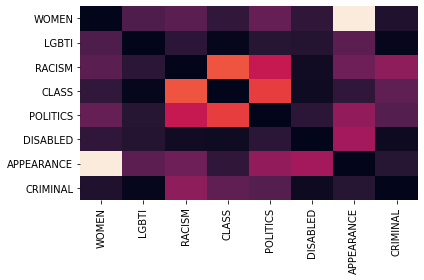

In [43]:

import seaborn as sns

sns.heatmap(heatmap, 
    #annot=True, fmt="d", 
    cbar=False)
plt.tight_layout()
plt.savefig("../figures/heatmap_characteristics.pdf")

## Heatmap artículos

Queremos ver cómo da el heatmap pero por artículos: es decir, como es la co-ocurrencia de discurso de odio por artículo y característica


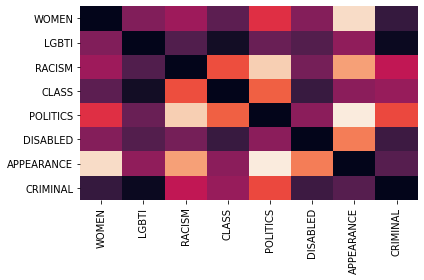

In [44]:
co_ocurrence = df.groupby("article_id").sum()[characteristics]

heatmap = pd.DataFrame(index=characteristics, columns=characteristics).fillna(0)


for idx, row in co_ocurrence[characteristics].iterrows():
    offended_chars = row.index[row > 0]
    # Perdón Guido
    for i in range(len(offended_chars)):
        first_char = offended_chars[i]
        for j in range(i+1, len(offended_chars)):
            second_char = offended_chars[j]
            first = row[[first_char, second_char]].mean()
            second =  first
            heatmap.loc[first_char, second_char] += first
            heatmap.loc[second_char, first_char] += second


sns.heatmap(heatmap, cbar=False)
plt.tight_layout()


plt.savefig("../figures/heatmap_characteristics_article.pdf")

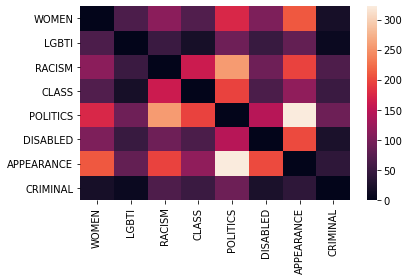

In [21]:
co_ocurrence = df.groupby("article_id").sum()[characteristics]

heatmap = pd.DataFrame(index=characteristics, columns=characteristics).fillna(0)


for idx, row in co_ocurrence[characteristics].iterrows():
    offended_chars = row.index[row > 0]
    # Perdón Guido
    for i in range(len(offended_chars)):
        first_char = offended_chars[i]
        for j in range(i+1, len(offended_chars)):
            second_char = offended_chars[j]
            first = 1
            second =  1
            heatmap.loc[first_char, second_char] += first
            heatmap.loc[second_char, first_char] += second


sns.heatmap(heatmap, norm)
plt.tight_layout()

<AxesSubplot:>

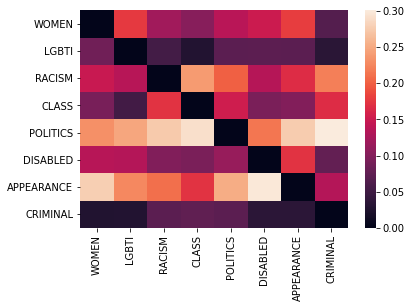

In [28]:
sns.heatmap(heatmap.divide(heatmap.sum()))

Se vé más o menos igual que el anterior, pero me gusta más ligeramente el otro (está más normalizado)